# WORD EMBEDDINGS

We'll learn about the concept of Word Embeddings, and how we can use them to model the semantic meanings of words in a high-dimensional embedding space!

**Word Embeddings** are a type of vectorization strategy that computes word vectors from a text corpus by training a neural network, which results in a high-dimensional embedding space, where each word in the corpus is a unique vector in that space. In this embedding space, the position of the vector relative to the other vectors captures semantic meaning.

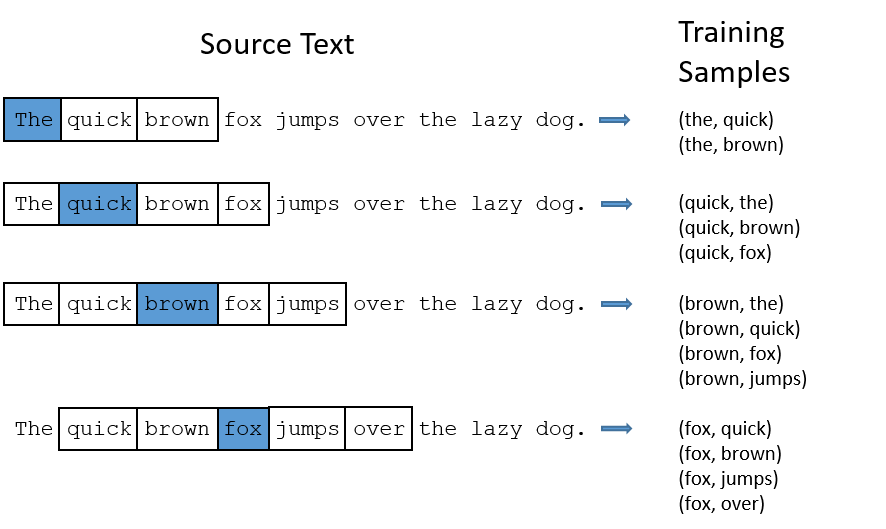

In the example above, the model has a window size of 5, meaning that the model considers a word, and the two words to the left and right of this word.

We shall proceed to generate word embeddings by training a Word2Vec model, and then embedding layers into deep neural networks for NLP!

We'll start by creating our own word embeddings by making use of the Word2Vec model. Then, move onto building neural networks that make use of **_Embedding Layers_** to accomplish the same end-goal, but directly in our model. 

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec
from nltk import word_tokenize

In the cell below, use the `read_json()` function from Pandas to read the dataset into a DataFrame. Be sure to include the parameter `lines=True` when reading in the dataset!

Once you've imported the data, inspect the first few rows of the DataFrame to see what your data looks like. 

In [3]:
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


### Preparing the Data

Since we are working with text data, we need to do some basic preprocessing including tokenization. Notice from the data sample that two different columns contain text data -- `headline` and `short_description`. The more text data your Word2Vec model has, the better it will perform. Therefore, we will want to combine the two columns before tokenizing each comment and training your Word2Vec model. 

In the cell below we are going to:

* Create a column called `'combined_text'` that consists of the data from the `'headline'` column plus a space character (`' '`) plus the data from the `'short_description'` column 
* Use the `'combined_text'` column's `.map()` method and pass in `word_tokenize`. Store the result returned in `data` 

In [4]:
df['combined_text'] = df['headline'] + ' ' +  df['short_description']
data = df['combined_text'].map(word_tokenize)

Inspect the first 5 items in `data` to see how everything looks. 

In [5]:
data[:5]

0    [There, Were, 2, Mass, Shootings, In, Texas, L...
1    [Will, Smith, Joins, Diplo, And, Nicky, Jam, F...
2    [Hugh, Grant, Marries, For, The, First, Time, ...
3    [Jim, Carrey, Blasts, 'Castrato, ', Adam, Schi...
4    [Julianna, Margulies, Uses, Donald, Trump, Poo...
Name: combined_text, dtype: object

Notice that although the words are tokenized, they are still in the same order they were in as headlines. This is important, because the words need to be in their original order for Word2Vec to establish the meaning of them. Remember that for a Word2Vec model you can specify a  **_Window Size_** that tells the model how many words to take into consideration at one time. 

If your window size was 5, then the model would start by looking at the words "Will Smith joins Diplo and", and then slide the window by one, so that it's looking at "Smith joins Diplo and Nicky", and so on, until it had completely processed the text example at index 1 above. By doing this for every piece of text in the entire dataset, the Word2Vec model learns excellent vector representations for each word in an **_Embedding Space_**, where the relationships between vectors capture semantic meaning (recall the vector that captures gender in the previous "king - man + woman = queen" example you saw).

Now that you've prepared the data, train your model and explore a bit!

### Training the Model

Start by instantiating a Word2Vec Model from `gensim`. 

In the cell below:

* Create a `Word2Vec` model and pass in the following arguments:
    * The dataset we'll be training on, `data`
    * The size of the word vectors to create, `size=100`
    * The window size, `window=5`
    * The minimum number of times a word needs to appear in order to be counted in  the model, `min_count=1` 
    * The number of threads to use during training, `workers=4`

In [6]:
model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

Now, that you've instantiated Word2Vec model, train it on your text data. 

In the cell below:

* Call the `.train()` method on your model and pass in the following parameters:
    * The dataset we'll be training on, `data`
    * The `total_examples`  of sentences in the dataset, which you can find in `model.corpus_count` 
    * The number of `epochs` you want to train for, which we'll set to `10`

In [7]:
model.train(data, total_examples=model.corpus_count, epochs=10)

(55588070, 67376200)

Great! You now have a fully trained model! The word vectors themselves are stored in the `Word2VecKeyedVectors` instance, which is stored in the `.wv` attribute. To simplify this, restore this object inside of the variable `wv` to save yourself some keystrokes down the line.

In [8]:
wv = model.wv

### Examining Your Word Vectors

Now that we have a trained Word2Vec model, go ahead and explore the relationships between some of the words in the corpus! 

One cool thing you can use Word2Vec for is to get the most similar words to a given word. You can do this by passing in the word to `wv.most_similar()`. 

In the cell below, we shall try getting the most similar word to `'Texas'`.

In [9]:
wv.most_similar('Texas')

[('Pennsylvania', 0.8117494583129883),
 ('Ohio', 0.792792558670044),
 ('Illinois', 0.7924824357032776),
 ('Oklahoma', 0.7907251119613647),
 ('Georgia', 0.7871103882789612),
 ('Arkansas', 0.7848122119903564),
 ('Maryland', 0.7842357158660889),
 ('Massachusetts', 0.783545196056366),
 ('California', 0.7826921343803406),
 ('Louisiana', 0.7796820402145386)]

Interesting! All of the most similar words are also states. 

You can also get the least similar vectors to a given word by passing in the word to the `.most_similar()` method's `negative` parameter. 

In the cell below, get the least similar words to `'Texas'`.

In [10]:
wv.most_similar(negative='Texas')

[('UIUC', 0.39038988947868347),
 ('Headstrong', 0.3819240629673004),
 ('torments', 0.3788212537765503),
 ('Unabashedly', 0.37553009390830994),
 ('went-off', 0.37428486347198486),
 ('Much-ness', 0.37406226992607117),
 ('Gatsby-Style', 0.3708670437335968),
 ('Supremacism', 0.3664276599884033),
 ('Lunatics', 0.3647119998931885),
 ('exiling', 0.3614785969257355)]

This seems like random noise. It is a result of the way Word2Vec is computing the similarity between word vectors in the embedding space. Although the word vectors closest to a given word vector are almost certainly going to have similar meaning or connotation with your given word, the word vectors that the model considers 'least similar' are just the word vectors that are farthest away, or have the lowest cosine similarity. It's important to understand that while the closest vectors in the embedding space will almost certainly share some level of semantic meaning with a given word, there is no guarantee that this relationship will hold at large distances. 

You can also get the vector for a given word by passing in the word as if you were passing in a key to a dictionary. 

In the cell below, get the word vector for `'Texas'`

In [11]:
wv['Texas']

array([ 1.3819256 ,  0.2867036 , -2.5771024 ,  0.09374967,  1.8179591 ,
       -1.3101826 , -1.1193428 ,  0.5044265 , -0.00996826, -0.0047857 ,
        1.4050257 , -0.09510282,  0.34712976, -1.0877485 , -1.3137764 ,
       -0.4754324 ,  1.2994369 , -0.342557  ,  1.3787897 ,  1.1340901 ,
        0.2661689 , -1.2873455 , -0.15274043,  1.543366  ,  0.7021871 ,
        0.8922532 , -1.2616025 ,  0.08704963, -0.41283047,  0.54828376,
       -2.0760808 ,  2.7515988 ,  0.10613095,  0.18368453, -0.28841242,
        0.5874273 , -0.8176241 , -1.687761  ,  0.53820217,  2.2421954 ,
       -1.0363739 ,  1.4570135 ,  0.96742755, -0.08710518,  1.3037133 ,
       -0.4608462 , -0.36523172, -1.3476957 ,  0.1613864 , -1.2642338 ,
       -0.8662634 ,  2.388122  , -1.621533  ,  0.6570063 , -1.8613398 ,
        1.3525109 , -1.6321905 , -0.53282434, -0.33484524,  1.1944728 ,
        1.8344877 , -2.2169633 ,  0.42547095, -0.64292914, -1.0432019 ,
       -0.6437893 , -1.9616796 , -2.2751303 , -0.05012549,  1.99

Now get all of the word vectors from the object at once. You can find these inside of `wv.vectors`. Try it out in the cell below.

In [12]:
wv.vectors

array([[ 1.12598264e+00, -1.37242126e+00, -9.43636656e-01, ...,
         2.64268547e-01,  5.83387196e-01,  1.81978679e+00],
       [ 8.12563419e-01, -2.20375466e+00, -1.04315853e+00, ...,
         7.84278333e-01,  1.29082215e+00,  2.55053401e+00],
       [ 5.69363534e-01, -1.76076734e+00,  4.62413043e-01, ...,
         4.52633321e-01, -2.89826369e+00,  2.51827002e+00],
       ...,
       [-2.22907867e-03,  4.26805504e-02, -1.08898608e-02, ...,
         7.32401386e-02,  3.13087255e-02,  1.47948666e-02],
       [-8.14316496e-02, -3.60644311e-02, -1.25129074e-02, ...,
         3.06510050e-02, -1.19267525e-02,  6.71614930e-02],
       [ 4.86981729e-03,  3.65508460e-02, -2.95532718e-02, ...,
         7.04186708e-02,  7.01277182e-02,  4.15716060e-02]], dtype=float32)

As a final exercise, try to recreate the _'king' - 'man' + 'woman' = 'queen'_ example previously mentioned. You can do this by using the `.most_similar()` method and translating the word analogies into an addition/subtraction formulation (as shown above). Pass the original comparison, which you are calculating a difference between, to the negative parameter, and the analogous starter you want to apply the same transformation to, to the `positive` parameter.

In [13]:
wv.most_similar(positive=['king', 'woman'], negative=['man'])

[('Mopey', 0.5453463196754456),
 ("'Volcano", 0.5203181505203247),
 ('villain', 0.4937487244606018),
 ("'Striped", 0.49161431193351746),
 ('Jeannette', 0.4890289604663849),
 ('ker', 0.48507800698280334),
 ('princess', 0.4839133024215698),
 ('conflation', 0.48245418071746826),
 ('Vicky', 0.480887770652771),
 ('Livin', 0.4791144132614136)]

As you can see from the output above, your model isn't perfect, but 'Queen' and 'Princess' are still in the top 5. As you can see from the other word in top 5, 'reminiscent' -- your model is far from perfect. This is likely because you didn't have enough training data. That said, given the small amount of training data provided, the model still performs remarkably well!

We have managed to train and use a Word2Vec model to create vectorized word embeddings!